<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании. Необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Необходимо обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/datasets/insurance.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.duplicated().sum()

153

In [5]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


In [8]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<BarContainer object of 4847 artists>

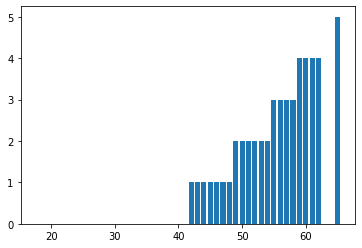

In [9]:
plt.bar(data['Возраст'], data['Страховые выплаты'])

In [10]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345)

Удалили дубликаты.
Выявили высокую корреляцию между выплатами и возрастом.
Определили фичи и таргеты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование:** 

E - единичная матрица
P - обратимая матрица

Представим новую матрицу $$ X = X * P $$ 

Подставим все в формулу обучения
$$
w = ((XP)^T XP)^{-1} (XP)^T y = P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}(X^TX)^{-1}X^Ty = P^{-1}w
$$

Теперь подставим все в формулу предсказания
$$ a = Xw = XPP^{-1}w = XEw = Xw = a $$

 Вывод: качество предсказания не изменится

## Алгоритм преобразования

**Алгоритм**

Создаем обратимую матрицу с случайными значениями. 
Получаем преобразованные признаки.


**Обоснование**



Создадим матрицы из фичей

In [12]:
matrix_train = features_train.values
matrix_test = features_test.values

Создадим матрицу из случайных значений

In [13]:
random_matrix = np.random.randn(4, 4)
random_matrix

array([[ 0.34471642, -0.13337868,  0.4960332 , -0.48067294],
       [ 0.52841748,  1.31099489, -1.50792473,  0.61734558],
       [ 0.09757611,  0.62356628,  0.45231683, -2.5225638 ],
       [ 1.08876903,  0.19412461,  0.12584486,  1.15612946]])

Проверим свойство обратимости матрицы

In [14]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1., -0., -0.],
       [ 0.,  0.,  1., -0.],
       [ 0., -0.,  0.,  1.]])

Матрица обратимая. Теперь умножаем фичи на матрицу.

In [15]:
matrix_test_ = matrix_test.dot(random_matrix)
matrix_train_ = matrix_train.dot(random_matrix)

## Проверка алгоритма

Проверим алгоритм на модели линейной регрессии

In [16]:
model = LinearRegression()
model.fit(matrix_train, target_train)
predicted = model.predict(features_test)
r2 = model.score(features_test, target_test)

In [17]:
model.fit(matrix_train_, target_train)
predicted_code = model.predict(matrix_test_)
code_r2 = model.score(matrix_test_, target_test)

In [18]:
print('R2 марицы: ', r2)
print('R2 закодированной марицы: ', code_r2)

R2 марицы:  0.4272661343811538
R2 закодированной марицы:  0.42726613438188266


Вывод: алгоритм проверен, метрики близки друг к другу.